### Linear Regression with Python

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of  hours they studied.

In [1]:
"""
Created on wed 05/05/2020 15:23:21 
#author: Kiran Shinkar
#Email - ki201shinkar@gmail.com
#WhatsApps - +91-9689678025
#LinkedIn - https://www.linkedin.com/in/kiran-shinkar-53960515b/
"""

'\nCreated on wed 05/05/2020 15:23:21 \n#author: Kiran Shinkar\n#Email - ki201shinkar@gmail.com\n#WhatsApps - +91-9689678025\n#LinkedIn - https://www.linkedin.com/in/kiran-shinkar-53960515b/\n'

In [2]:
# libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm 

In [3]:
import webbrowser
# generate an URL
url = "https://bit.ly/w-data"
df = pd.read_csv(url)

In [4]:
df.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [5]:
# Lets check null values in dataset
df.isna().sum() # 

Hours     0
Scores    0
dtype: int64

In [6]:
# lets describe the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# checking relation between Hours and Scores.

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

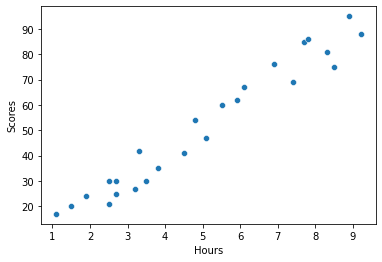

In [8]:
sns.scatterplot(x='Hours', y = 'Scores', data = df)

In [9]:
# Graph clearly shows there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot:>

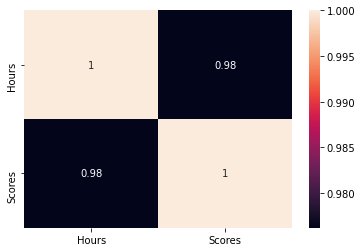

In [10]:
sns.heatmap(df.corr(), annot = True)

## Preparing data for model

In [11]:
X = df['Hours']
y = df['Scores'] 

#### split data into training and test sets by using 'Scikit-Learn's built-in train_test_split() method.

In [12]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size = 0.2, random_state= 12)

In [13]:
# Lets check the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20,)
(5,)
(20,)
(5,)


In [14]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [15]:
X_train.shape

(20, 1)

### Training the Algorithm

In [16]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
print(lm.coef_)
print(lm.intercept_)

[[9.65531967]]
[2.89069974]


In [30]:
Y0 = lm.intercept_ + lm.coef_*X_train
Y0

array([[83.02985297],
       [36.68431857],
       [13.51155137],
       [39.58091447],
       [27.02899891],
       [77.23666117],
       [69.51240544],
       [78.20219314],
       [49.23623414],
       [28.96006284],
       [34.75325464],
       [17.37367924],
       [27.02899891],
       [46.33963824],
       [28.96006284],
       [84.9609169 ],
       [33.78772267],
       [21.23580711],
       [91.71964067],
       [59.85708577]])

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

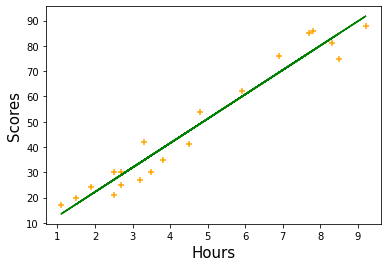

In [36]:
##plotting on train data
plt.scatter(X_train,y_train,color='orange',marker='+')
plt.plot(X_train,Y0,color='green')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

### Make Prediction

In [19]:
print(X_test)

[[7.4]
 [5.5]
 [6.1]
 [5.1]
 [8.9]]


In [20]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [21]:
y_test

array([[69],
       [60],
       [67],
       [47],
       [95]], dtype=int64)

In [22]:
y_test_pred

array([[74.34006527],
       [55.9949579 ],
       [61.7881497 ],
       [52.13283004],
       [88.82304477]])

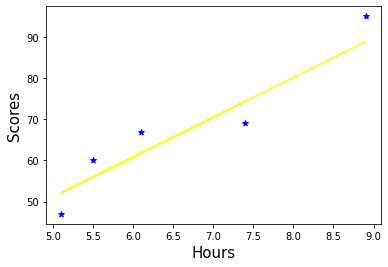

In [40]:
plt.plot(X_test,y_test_pred,color='yellow')
plt.scatter(X_test,y_test,color='blue',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

### Evaluating the Model

In [24]:
# Lets check how our algorithm perform on a particular dataset.

In [25]:
from sklearn import metrics  
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
print(r2_score(y_true=y_train, y_pred = y_train_pred))
print(r2_score(y_true=y_test, y_pred = y_test_pred))

0.9528277512045826
0.8897176466006437


In [27]:
print('Mean Square Error:', 
      metrics.mean_squared_error(y_test, y_test_pred))

Mean Square Error: 27.244152583776987


In [28]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred)) 

Mean Absolute Error: 5.173348586293498


## Predicting the score

In [23]:
input_value = [[9.25]]
result = lm.predict(input_value)

print("No of Hours studied = {}".format(input_value))
print("Predicted Score = {}".format(result[0]))

No of Hours studied = [[9.25]]
Predicted Score = [92.20240665]


### When student study for 9.25hrs/day then predicted score is 92.2024.